In [18]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [2]:
import os

dirs = os.listdir('Images/')
for dir in dirs:
    files = os.listdir(f'Images/{dir}')
    print(f"{dir} Folder has {len(files)} Images")


daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images


In [3]:
import os

count = 0
dirs = os.listdir('Images/')

for dir in dirs:
    files = os.listdir(f'Images/{dir}')
    print(f"{dir} Folder has {len(files)} Images")
    count += len(files)

print(f"\nImages Folder has {count} Images in total")


daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images

Images Folder has 4317 Images in total


In [4]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    validation_split=0.2,
    subset="training",
    batch_size=batch,
    image_size=(img_size, img_size)
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    validation_split=0.2,
    subset="validation",
    batch_size=batch,
    image_size=(img_size, img_size)
)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [6]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [7]:
import matplotlib.pyplot as plt

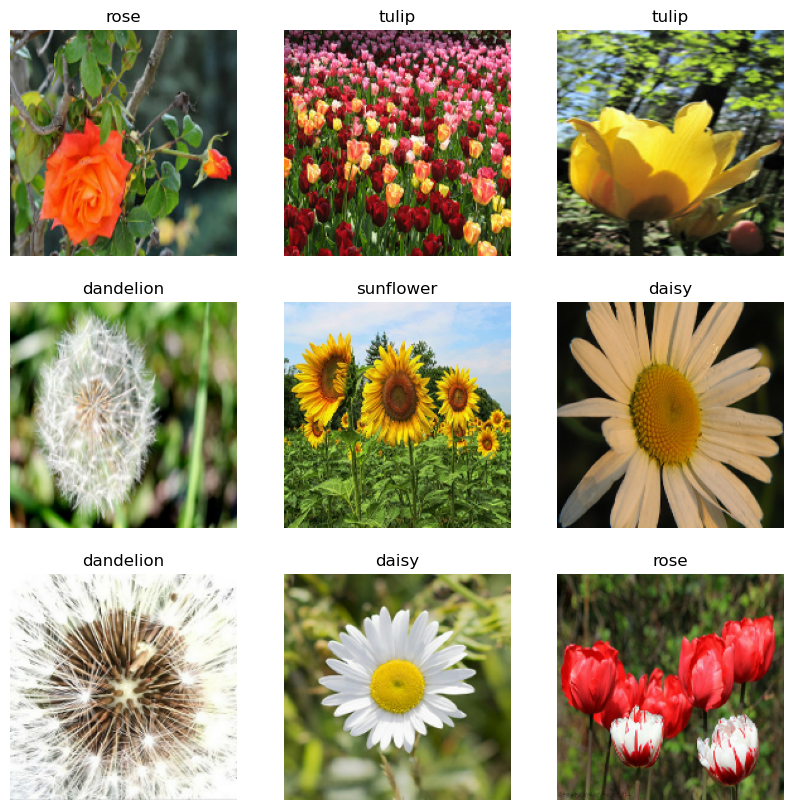

In [8]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [11]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [12]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\Dell\.conda\envs\tensorflow_env\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


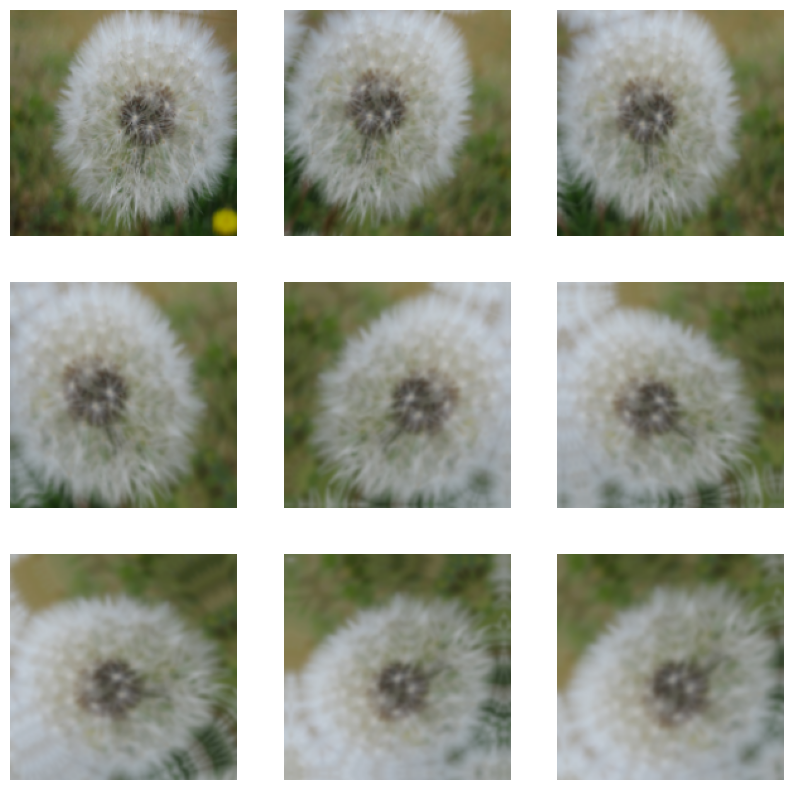

In [16]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [19]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ sequential (Sequential)       │ (None, 180, 180, 3)   │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ rescaling_1 (Rescaling)       │ (None, 180, 180, 3)   │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 180, 180, 16)  │          448 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 90, 90, 16)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_2 (Conv2D)             │ (None, 90, 90, 32)    │        4,640 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 45, 45, 32)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_3 (Conv2D)             │ (None, 45, 45, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_2               │ (None, 22, 22, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout (Dropout)             │ (None, 22, 22, 64)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 30976)         │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 128)           │    3,965,056 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 5)             │          645 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 57s 495ms/step - accuracy: 0.2819 - loss: 1.6990 - val_accuracy: 0.4809 - val_loss: 1.2191
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 45s 414ms/step - accuracy: 0.5400 - loss: 1.1153 - val_accuracy: 0.5713 - val_loss: 1.0436
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 437ms/step - accuracy: 0.5863 - loss: 1.0358 - val_accuracy: 0.5886 - val_loss: 1.0189
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 45s 417ms/step - accuracy: 0.6361 - loss: 0.9518 - val_accuracy: 0.6083 - val_loss: 0.9758
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 44s 406ms/step - accuracy: 0.6343 - loss: 0.9408 - val_accuracy: 0.6107 - val_loss: 0.9574
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 43s 398ms/step - accuracy: 0.6676 - loss: 0.8760 - val_accuracy: 0.6651 - val_loss: 0.8532
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 45s 414ms/step - accuracy: 0.6921 - loss: 0.7945 - val_accuracy: 0.6466 - val_loss: 0.8723
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 450ms/step - accuracy: 0.7055 - loss: 0

In [34]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of ' + str(round(100 * np.max(result), 4))
    return outcome


In [35]:
classify_images('Samples/Rose.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


'The Image belongs to rose with a score of 84.1874'

In [31]:
classify_images('Samples/Rose.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


'The Image belongs to daisy with a score of 99.99737'

In [36]:
model.save('Flower_Recog_Model.h5')